In [1]:
import sys
sys.path.append('../')
import base
import matplotlib.pyplot as plt
import numpy as np
import os
import fnmatch

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [5]:
root_paths1 = ['../../Data/Raw/']*8
root_paths2 = ['../../Data/Raw/']*7
tags1 = ['20190923-174441', '20191001-112411', '20191002-115000', \
        '20191106-170809', '20191107-183857', '20191108-145125', \
       '20191118-161325', '20191127-122008']
tags2 = ['20190923-171112', '20191001-115127', '20191002-111038',\
         '20191107-174215', '20191108-142321', '20191118-171209',\
         '20191127-132223']
rat_fs1 = base.MultiDaysBeaconPosition(root_paths1, tags1, has_beacon = False, has_metadata= False)
rat_fs2 = base.MultiDaysBeaconPosition(root_paths2, tags2, has_beacon = False, has_metadata = False)

In [ ]:
root_w_beacon = ['../../Data/Raw/']
tag_w_beacon = ['20200130-151829']
rat_fs_beacon = base.MultiDaysBeaconPosition(root_w_beacon, tag_w_beacon, has_beacon = True, has_metadata= False)


In [2]:
root_w_beacon_meta = ['../FS04/Control/']
tag_w_beacon_meta = ['20210315-155158']
rat_fs_beacon_meta = base.MultiDaysBeaconPosition(root_w_beacon_meta, tag_w_beacon_meta, has_beacon = True, has_metadata= True)



../base.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T
../base.py:120: FutureWarning: `item` has been deprecated and will be removed in a future version
  invisible_time = eval(metadata['invisible_time'].item())
../base.py:121: FutureWarning: `item` has been deprecated and will be removed in a future version
  invisible_index = eval(metadata['invisible_list'].item())
../base.py:122: FutureWarning: `item` has been deprecated and will be removed in a future version
  invisible_frequency = eval(metadata['light_off'].item())


## Crawling function to generate tags automatically for each animal on file. 

In [72]:
def Make_tags (rat_ID="FS11"):
    """Takes in animal ID and searches through a specific subfolder in storage 2 to generate time tags for each session
    
    PARAMS
    ------------
    rat_ID : str
        name of animal
    
    Returns
    ------------
    list of str of roots and list of str of tags - date time   
    
    """
    animal= '//10.153.170.3/storage2/fabian/data/project/'+rat_ID 
    dirnames = [ name for name in os.listdir(animal) if os.path.isdir(os.path.join(animal, name)) ]   
    roots = [k for k in dirnames if 'BP' in k]
    filter_tags = [x[-15:] for x in roots]
    filter_roots = [animal + s for s in roots]
    return filter_roots, filter_tags, 
root, tags = Make_tags ("FS11")

In [74]:
root, tags = Make_tags ("FS11/")
#print (root)
#print( tags)
rat_fs11 = base.MultiDaysBeaconPosition(root, tags, has_beacon = False, has_metadata= False)

In [49]:
rat_fs11.num_sessions



26

In [59]:
rat_fs11.median_speed

14.087978755110573

In [60]:
rat_fs11.get_trials

<bound method MultiDaysBeaconPosition.get_trials of <base.MultiDaysBeaconPosition object at 0x0000000019E98C18>>

In [67]:
rat_fs11 = base.MultiDaysBeaconPosition(root, tags, has_beacon = False, has_metadata= False)
rat_fs11.dataset_list[0:5]

..\base.py:33: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


In [69]:
data = rat_fs11.trial_list[1]
#data = rat_fs11.get_trials
for trial in data:
    plt.scatter(trial[:,1], trial[:,2], s=1)

AttributeError: 'MultiDaysBeaconPosition' object has no attribute 'trial_list'

In [57]:
data = base.BeaconPosition(root[1], tags[1], has_beacon = True, has_metadata = True)
data

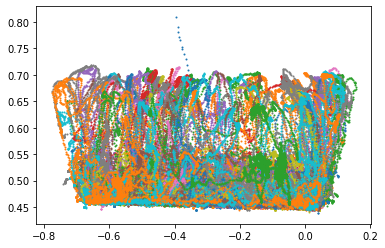

In [58]:

for trial in data.trial_list:
    plt.scatter(trial[:,1], trial[:,2], s=1)

In [71]:
data = base.MultiDaysBeaconPosition(root, tags, has_beacon = False, has_metadata= False)
for i in range(len(data.trial_list[0])):
    straightness_moment = path_analysis.straightness_moment_time(data.trial_list[0][i][:,:3], before_time=2)
    straightness_time = path_analysis.straightness_over_time(data.trial_list[0][i][:,:3], before_time=2)
    if data.trial_visible[0][i]:
        plt.plot(straightness_time[0], c='magenta')
    else:
        plt.plot(straightness_time[0],c='cyan')

..\base.py:33: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


AttributeError: 'MultiDaysBeaconPosition' object has no attribute 'trial_list'